In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set(style="whitegrid")

/home/sunzewen/first-week/first-week/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sunzewen/first-week/first-week/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Load Data
train_df = pd.read_csv("../data/train.csv")
train_df.Label = train_df.Label.astype('category')

test_df = pd.read_csv("../data/test.csv")
validation_df = pd.read_csv("../data/valid.csv")

In [3]:
train_df.describe()

,Context,Utterance,Label
count,1000000,1000000,1000000
unique,957097,736145,2
top,! op __eou__ __eot__ ? __eou__ __eot__,thank __eou__,0
freq,15,12426,500127


In [4]:
pd.options.display.max_colwidth=500
train_df.head()

,Context,Utterance,Label
0,"i think we could import the old comment via rsync , but from there we need to go via email . i think it be easier than cach the status on each bug and than import bite here and there __eou__ __eot__ it would be veri easi to keep a hash db of message-id __eou__ sound good __eou__ __eot__ ok __eou__ perhap we can ship an ad-hoc apt_preferec __eou__ __eot__ version ? __eou__ __eot__ thank __eou__ __eot__ not yet __eou__ it be cover by your insur ? __eou__ __eot__ yes __eou__ but it 's realli no...",basic each xfree86 upload will not forc user to upgrad 100mb of font for noth __eou__ no someth i do in my spare time . __eou__,1
1,"i 'm not suggest all - onli the one you modifi . __eou__ __eot__ ok , it sound like you re agre with me , then __eou__ though rather than `` the one we modifi '' , my idea be `` the one we need to merg '' __eou__ __eot__",sorri __eou__ i think it be ubuntu relat . __eou__,0
2,"afternoon all __eou__ not entir relat to warti , but if grub-instal take 5 minut to instal , be this a sign that i should just retri the instal : ) __eou__ __eot__ here __eou__ __eot__ you might want to know that thinic in warti be buggi compar to that in sid __eou__ __eot__ and appar gnome be suddent almost perfect ( out of the thinic problem ) , nobodi report bug : -p __eou__ i do n't get your question , where do you want to past ? __eou__ __eot__ can i file the panel not link to ed ? : ) ...","yep . __eou__ oh , okay . i wonder what happen to you __eou__ what distro do you need ? __eou__ yes __eou__",0
3,"interest __eou__ grub-instal work with / be ext3 , fail when it be xfs __eou__ i think d-i instal the relev kernel for your machin . i have a p4 and it instal the 386 kernel __eou__ holi crap a lot of stuff get instal by default : ) __eou__ you be instal vim on a box of mine __eou__ ; ) __eou__ __eot__ more like osx than debian ; ) __eou__ we have a select of python modul avail for great justic ( and python develop ) __eou__ __eot__ 2.8 be fix them iirc __eou__ __eot__ pong __eou__ vino will...",that the one __eou__,1
4,"and becaus python give mark a woodi __eou__ __eot__ i 'm not sure if we re mean to talk about that public yet . __eou__ __eot__ and i think we be a `` pant off '' kind of compani ... : p __eou__ you need new glass __eou__ __eot__ mono 1.0 ? dude , that 's go to be a barrel of laugh for total non-releas relat reason dure hoari __eou__ read bryan clark 's entri about networkmanag ? __eou__ __eot__ there be an accompani irc convers to that one < g > __eou__ explain ? __eou__ i guess you could s...",( i think someon be go to make a joke about .au bandwidth ... ) __eou__ especi not if you re use screen ; ) __eou__,1


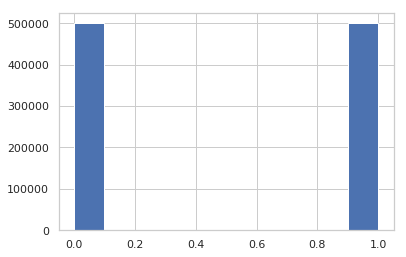

In [5]:
train_df.Label.hist()

In [6]:
train_df_context_len = train_df.Context.str.split(" ").apply(len)
train_df_Utterance_len = train_df.Utterance.str.split(" ").apply(len)

In [7]:
print(train_df_context_len.describe())
print(train_df_Utterance_len.describe())

count    1000000.000000
mean          86.339195
std           74.929713
min            5.000000
25%           37.000000
50%           63.000000
75%          108.000000
max         1879.000000
Name: Context, dtype: float64
count    1000000.000000
mean          17.246392
std           16.422901
min            1.000000
25%            7.000000
50%           13.000000
75%           22.000000
max          653.000000
Name: Utterance, dtype: float64


In [8]:
pd.options.display.max_colwidth=50
test_df.describe()

,Context,Ground Truth Utterance,Distractor_0,Distractor_1,Distractor_2,Distractor_3,Distractor_4,Distractor_5,Distractor_6,Distractor_7,Distractor_8
count,18920,18920,18920,18920,18920,18920,18920,18920,18920,18920,18920
unique,18920,17914,13982,13902,14077,14041,14101,14072,13969,13975,14123
top,"ubiqu be the name of the instal , exact the sa...",thank __eou__,thank __eou__,thank __eou__,thank __eou__,thank __eou__,thank __eou__,thank __eou__,thank __eou__,thank __eou__,thank __eou__
freq,1,186,176,186,194,195,167,197,190,188,201


In [9]:
import tensorflow as tf



class reader(object):
    def __init__(self):
        self.train_file_path  = "../data/train.csv"
        self.dict_file_path = "/mnt/cephfs/dataset/sentence_with_punc/ch_en_15k.dict"
        self._CSV_COLUMN_DEFAULTS = [[''],[''],[1]]
        self._CSV_CLOLUMNS = ['Context','Utterance','Label']
        self.word_dict = {}
        with open(self.dict_file_path, 'r') as f:
            for l in f.readlines():
                word, idx = l.split(' ')[0], l.split(' ')[1]
                self.word_dict[word] = int(idx)
        print("word_dict size:", len(self.word_dict))
        self.UNK_ID = self.word_dict['<unk>']
        
        
        kv_initializer = tf.contrib.lookup.TextFileInitializer(
            self.dict_file_path,tf.string,0,tf.float32,1,delimiter=" ")
        self.lookup_table = tf.contrib.lookup.HashTable(kv_initializer,self.UNK_ID)
        dataset = tf.data.TextLineDataset(self.train_file_path).repeat()
        dataset = dataset.skip(1)
        dataset = dataset.map(self.parseCSVLine)
        dataset = dataset.map(self.lookUpDict)
        dataset = dataset.filter(lambda line: line['lenQuery']<100)
        dataset = dataset.filter(lambda line: line['lenResponse']<100)
#         filter(lambda line: tf.not_equal(tf.substr(line, 0, 1), "#")
        dataset = dataset.padded_batch(32,padded_shapes={'Context':[100],
                                                         'Utterance':[100],
                                                         'Label':[],
                                                         'lenQuery':[],
                                                         'lenResponse':[]})
#         dataset = dataset.batch(10)
        self.iterator = dataset.make_initializable_iterator()
        
    def parseCSVLine(self,value):
        columns = tf.decode_csv(value,self._CSV_COLUMN_DEFAULTS)
        fetures = dict(zip(self._CSV_CLOLUMNS,columns))
        return fetures

    def lookUpDict(self,value):
#         print(value['Query'])
#         value['Query'] = self.lookup_table.lookup(value['Context'])
        value['Context'] = self.lookup_table.lookup(
            tf.string_split((value['Context']," "))).values
        value['lenQuery'] = tf.size(value['Context'])
        value['Utterance'] = self.lookup_table.lookup(
            tf.string_split((value['Utterance']," "))).values
        value['lenResponse'] = tf.size(value['Utterance'])
        value['Label'] = tf.cast(value['Label'],tf.float32)
        return value
    
    def init_reader(self,sess):
        sess.run(self.lookup_table.init)
    
    def epoch_input(self):
        return self.iterator

with tf.Session() as sess:
    train_textline = reader()
    train_textline.init_reader(sess)
    sess.run(train_textline.epoch_input().initializer)
    for i in range(1):
        a = train_textline.epoch_input().get_next()['Context']
        print(sess.run(train_textline.epoch_input().get_next()))

/home/sunzewen/first-week/first-week/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


word_dict size: 15003
{'lenResponse': array([10, 25,  5,  8, 13, 14, 10, 23, 21, 11, 25, 29, 29,  5, 10,  2, 18,
        8, 11, 17, 16,  8, 14, 17, 69, 38, 45,  3,  5, 23, 42, 21],
      dtype=int32), 'Utterance': array([[    0.,     0.,  2341., ...,     0.,     0.,     0.],
       [ 3856., 10723.,  4133., ...,     0.,     0.,     0.],
       [ 8511.,  7469.,     0., ...,     0.,     0.,     0.],
       ...,
       [    0.,  4444.,  8938., ...,     0.,     0.,     0.],
       [    0.,     0.,  7475., ...,     0.,     0.,     0.],
       [ 2341.,     0.,  2341., ...,     0.,     0.,     0.]],
      dtype=float32), 'Context': array([[ 2341.,     0.,  6658., ...,     0.,     0.,     0.],
       [    0.,  7062., 12439., ...,     0.,     0.,     0.],
       [ 3687.,  2032.,     0., ...,     0.,     0.,     0.],
       ...,
       [    0.,   115.,     0., ...,     0.,     0.,     0.],
       [ 4479.,   115.,     0., ...,     0.,     0.,     0.],
       [ 6363.,  3687.,     0., ...,     0.,  

In [ ]:
import keras
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Bidirectional
from keras.layers import Embedding, LSTM, Input
from keras.models import Sequential
from keras.models import Model
from keras.optimizers import SGD
from keras import backend as K
from keras.layers import merge
from keras.utils import multi_gpu_model


train_textline = reader()
train_textline.init_reader(K.get_session())
K.get_session().run(train_textline.epoch_input().initializer)

encoder = Sequential()
embeddin_layer = Embedding(output_dim=20,input_dim=100,
                      input_length=400,mask_zero=True,trainable=True)
encoder.add(embeddin_layer)
encoder.add(LSTM(units=30))

# context_input = Input(tensor=tf.reshape(train_textline.epoch_input().get_next()['Context'],[-1,1]))
# response_input = Input(tensor=tf.reshape(train_textline.epoch_input().get_next()['Utterance'],[-1,1]))
context_input = Input(tensor=train_textline.epoch_input().get_next()['Context'])
response_input = Input(tensor=train_textline.epoch_input().get_next()['Utterance'])
context_branch = encoder(context_input)
response_branch = encoder(response_input)
# concatenated = keras.layers.Multiply()([context_branch, response_branch])

concatenated = keras.layers.Dot(axes=1)([context_branch, response_branch])
out = Dense((1), activation = "sigmoid") (concatenated)
dual_encoder = Model([context_input, response_input], out)
# dual_encoder = multi_gpu_model(dual_encoder,gpus=2)
dual_encoder.compile(loss='binary_crossentropy',
                optimizer='SGD',
                metrics=['accuracy'],
                target_tensors = [tf.reshape(train_textline.epoch_input().get_next()['Label'],[-1,1])])
dual_encoder.summary()
dual_encoder.fit(epochs=1,steps_per_epoch=10000)

word_dict size: 15003
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 30)           8120        input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
dot_3 (Dot)                     (None, 1)            0           sequential_3[1][0]    